In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from astropy.coordinates import SkyCoord
from astropy import units as u
%config InlineBackend.figure_format = 'retina'

In [15]:
det_cats = {
    'pz_rot28' : pd.read_csv('/home/rt2122/Data/detected_cats/full_pz_rot28_thr0.1_step8_no_fn.csv'),
    'pz_act_found2_22' : pd.read_csv('/home/rt2122/Data/detected_cats/full_pz_act_found2_22_thr0.1_step8_no_fn.csv'),
    'pz_all_found34' : pd.read_csv('/home/rt2122/Data/detected_cats/full_pz_all_found34_thr0.1_step8_no_fn.csv')
}

In [16]:
true_cats = {
    'planck_z' : pd.read_csv('/home/rt2122/Data/clusters/planck_z.csv'),
    'MCXC' : pd.read_csv('/home/rt2122/Data/original_catalogs/csv/MCXC.csv'),
    'ACT' : pd.read_csv('/home/rt2122/Data/original_catalogs/csv/ACT.csv')
}

In [22]:
det = det_cats['pz_rot28'].copy()
det = det[det['catalog'] == 'planck_z']
q = det['max_pred'].quantile(0.1) # 10% найденных скоплений из planck_z имеют max_pred <= q
q

0.809162687510252

In [23]:
det = det_cats['pz_act_found2_22'].copy()
det = det[det['catalog'] == 'planck_z']
q = det['max_pred'].quantile(0.1) # 10% найденных скоплений из planck_z имеют max_pred <= q
q

0.6397205097600818

In [24]:
det = det_cats['pz_all_found34'].copy()
det = det[det['catalog'] == 'planck_z']
q = det['max_pred'].quantile(0.1) # 10% найденных скоплений из planck_z имеют max_pred <= q
q

0.6837768717668951

In [12]:
def m500_z_graph(cat_name, det_name, q_rat=0.1):
    df = pd.read_csv(cat_name)
    df = df[df['status'] != 'fn']
    df.index = np.arange(len(df))
    
    true_cats = {'planck_z' : pd.read_csv('/home/rt2122/Data/clusters/planck_z.csv'),
                'MCXC' : pd.read_csv('/home/rt2122/Data/original_catalogs/csv/MCXC.csv'),
                'ACT' : pd.read_csv('/home/rt2122/Data/original_catalogs/csv/ACT.csv')}
    true_sc = {key : SkyCoord(ra=np.array(true_cats[key]['RA']) * u.degree, 
                              dec=np.array(true_cats[key]['DEC']) * u.degree, frame='icrs') for key in true_cats}
    
    q = df[df['catalog'] == 'planck_z']['max_pred'].quantile(q_rat)
    sc = SkyCoord(ra=np.array(df['RA']) * u.degree, dec=np.array(df['DEC']) * u.degree, frame='icrs')
    
    for name in true_cats:
        idx, d2d, _ = true_sc[name].match_to_catalog_sky(sc)
        true_cats[name]['max_pred'] = 0
        true_cats[name]['max_pred'] = np.array(df['max_pred'][idx])
        matched = d2d.degree < (400 / 3600)
        true_cats[name] = true_cats[name][matched]
        true_cats[name].index = np.arange(len(true_cats[name]))
    
    _, ax = plt.subplots(1, 2, figsize=(20, 10), sharex=True, sharey=True)
    for i, (st, en) in enumerate([[0, 1], [q, 1]]):
        for name, c in zip(true_cats, ['b', 'r', 'c']):
            cur_cat = true_cats[name]
            match_max_pred = np.logical_and(st <= cur_cat['max_pred'], cur_cat['max_pred'] <= en)
            s = ax[i].scatter(cur_cat[match_max_pred]['z'], cur_cat[match_max_pred]['M500'], c=c, alpha=0.2)
            s.set_label('matches with {} and {} in max_pred [{:.2f}, {:.2f}]'.format(name, det_name, st , en))
        
        ax[i].set_xlabel('z')
        ax[i].set_ylabel('M500')
        ax[i].grid()
        ax[i].legend()

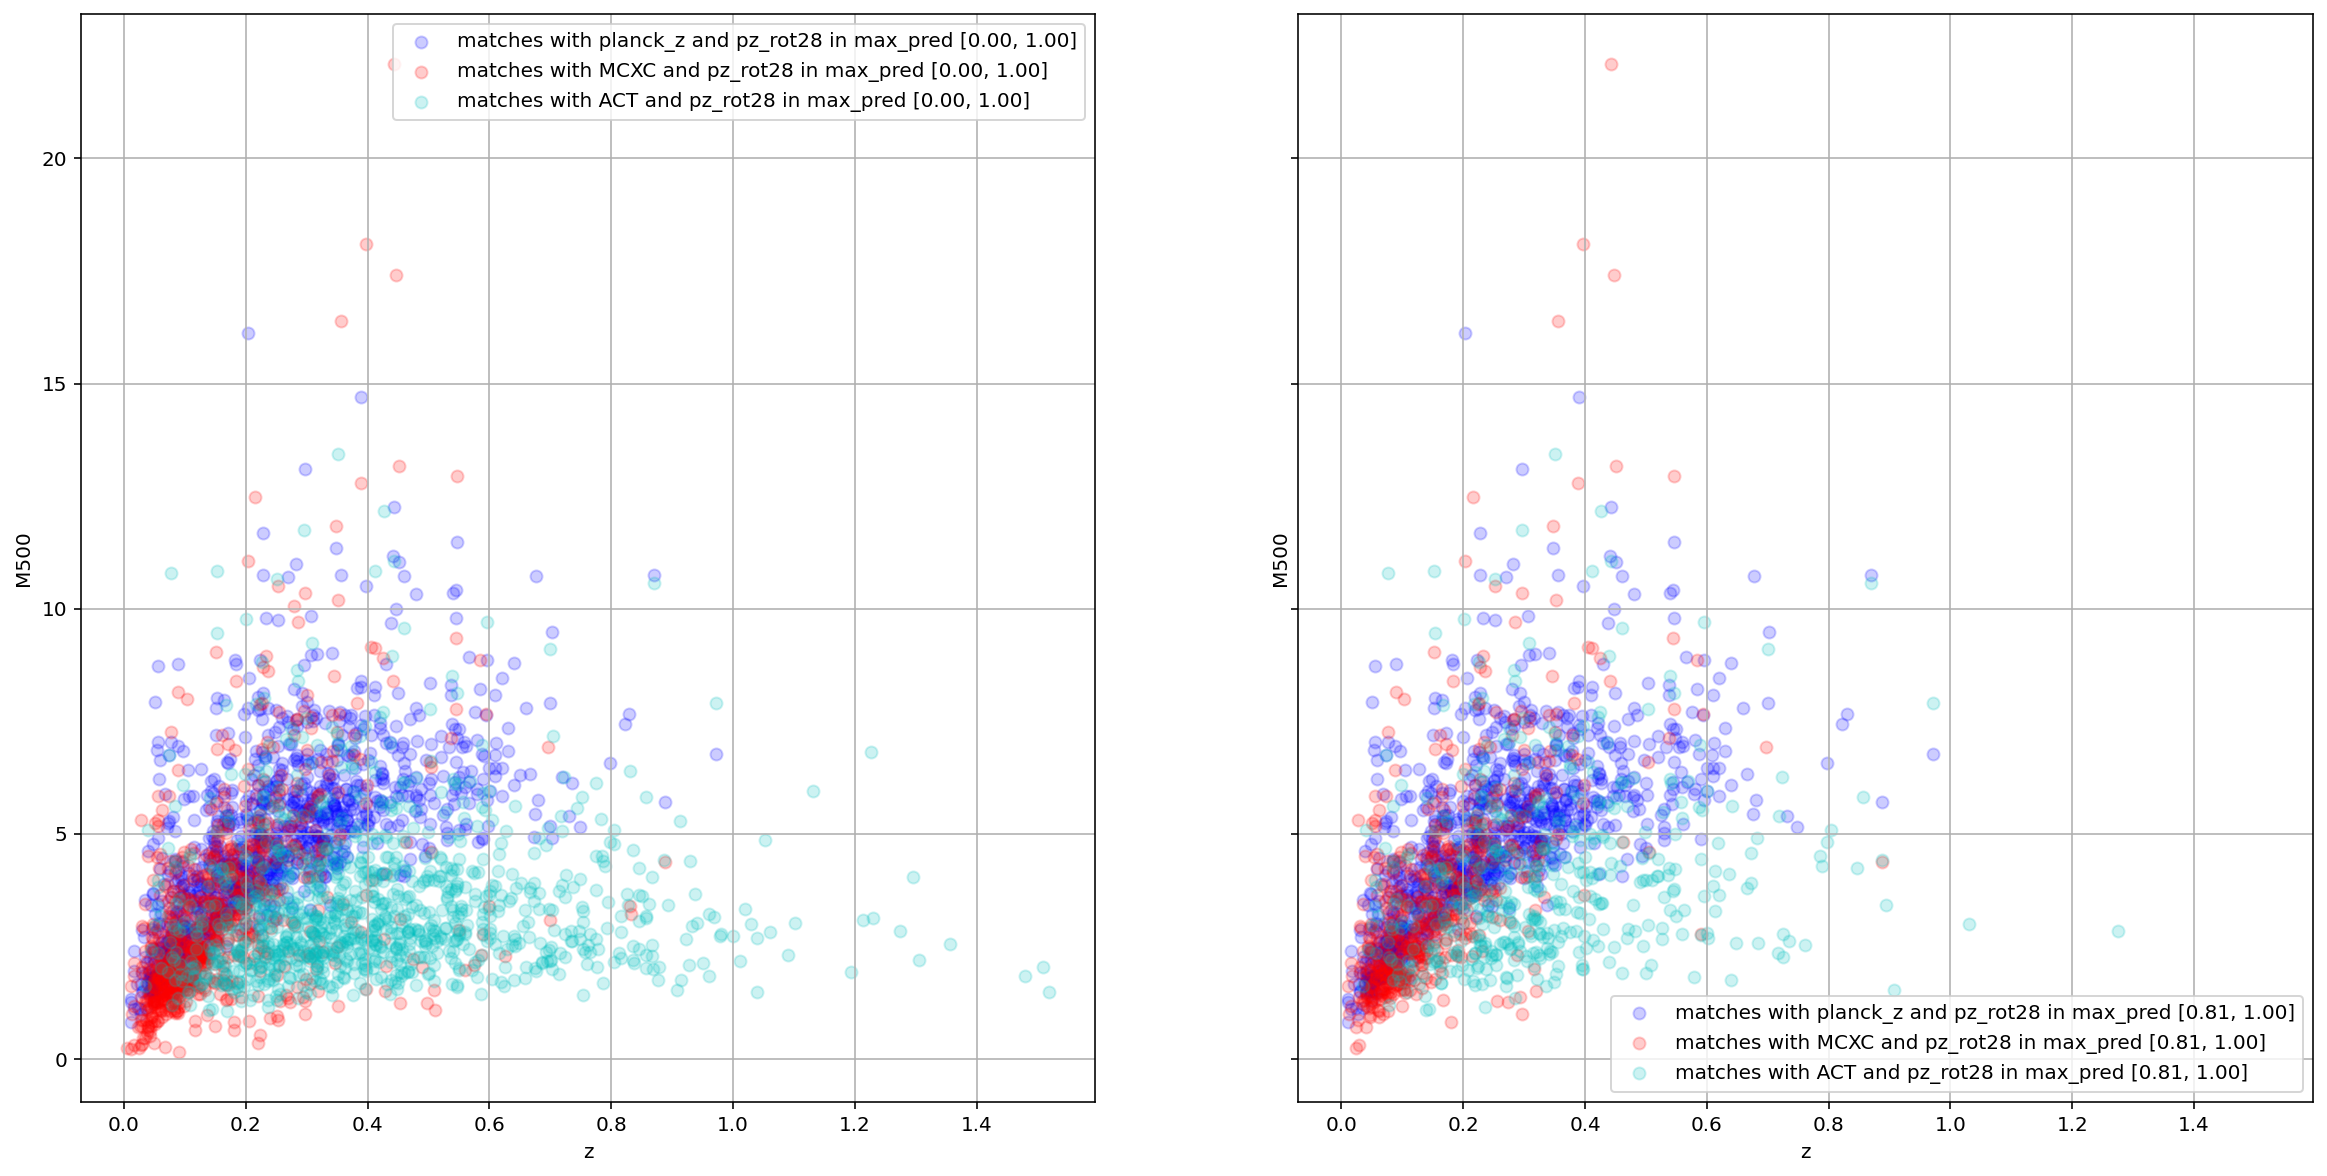

In [16]:
m500_z_graph('/home/rt2122/Data/detected_cats/full_pz_rot28_thr0.1_step8_no_fn.csv', 'pz_rot28')

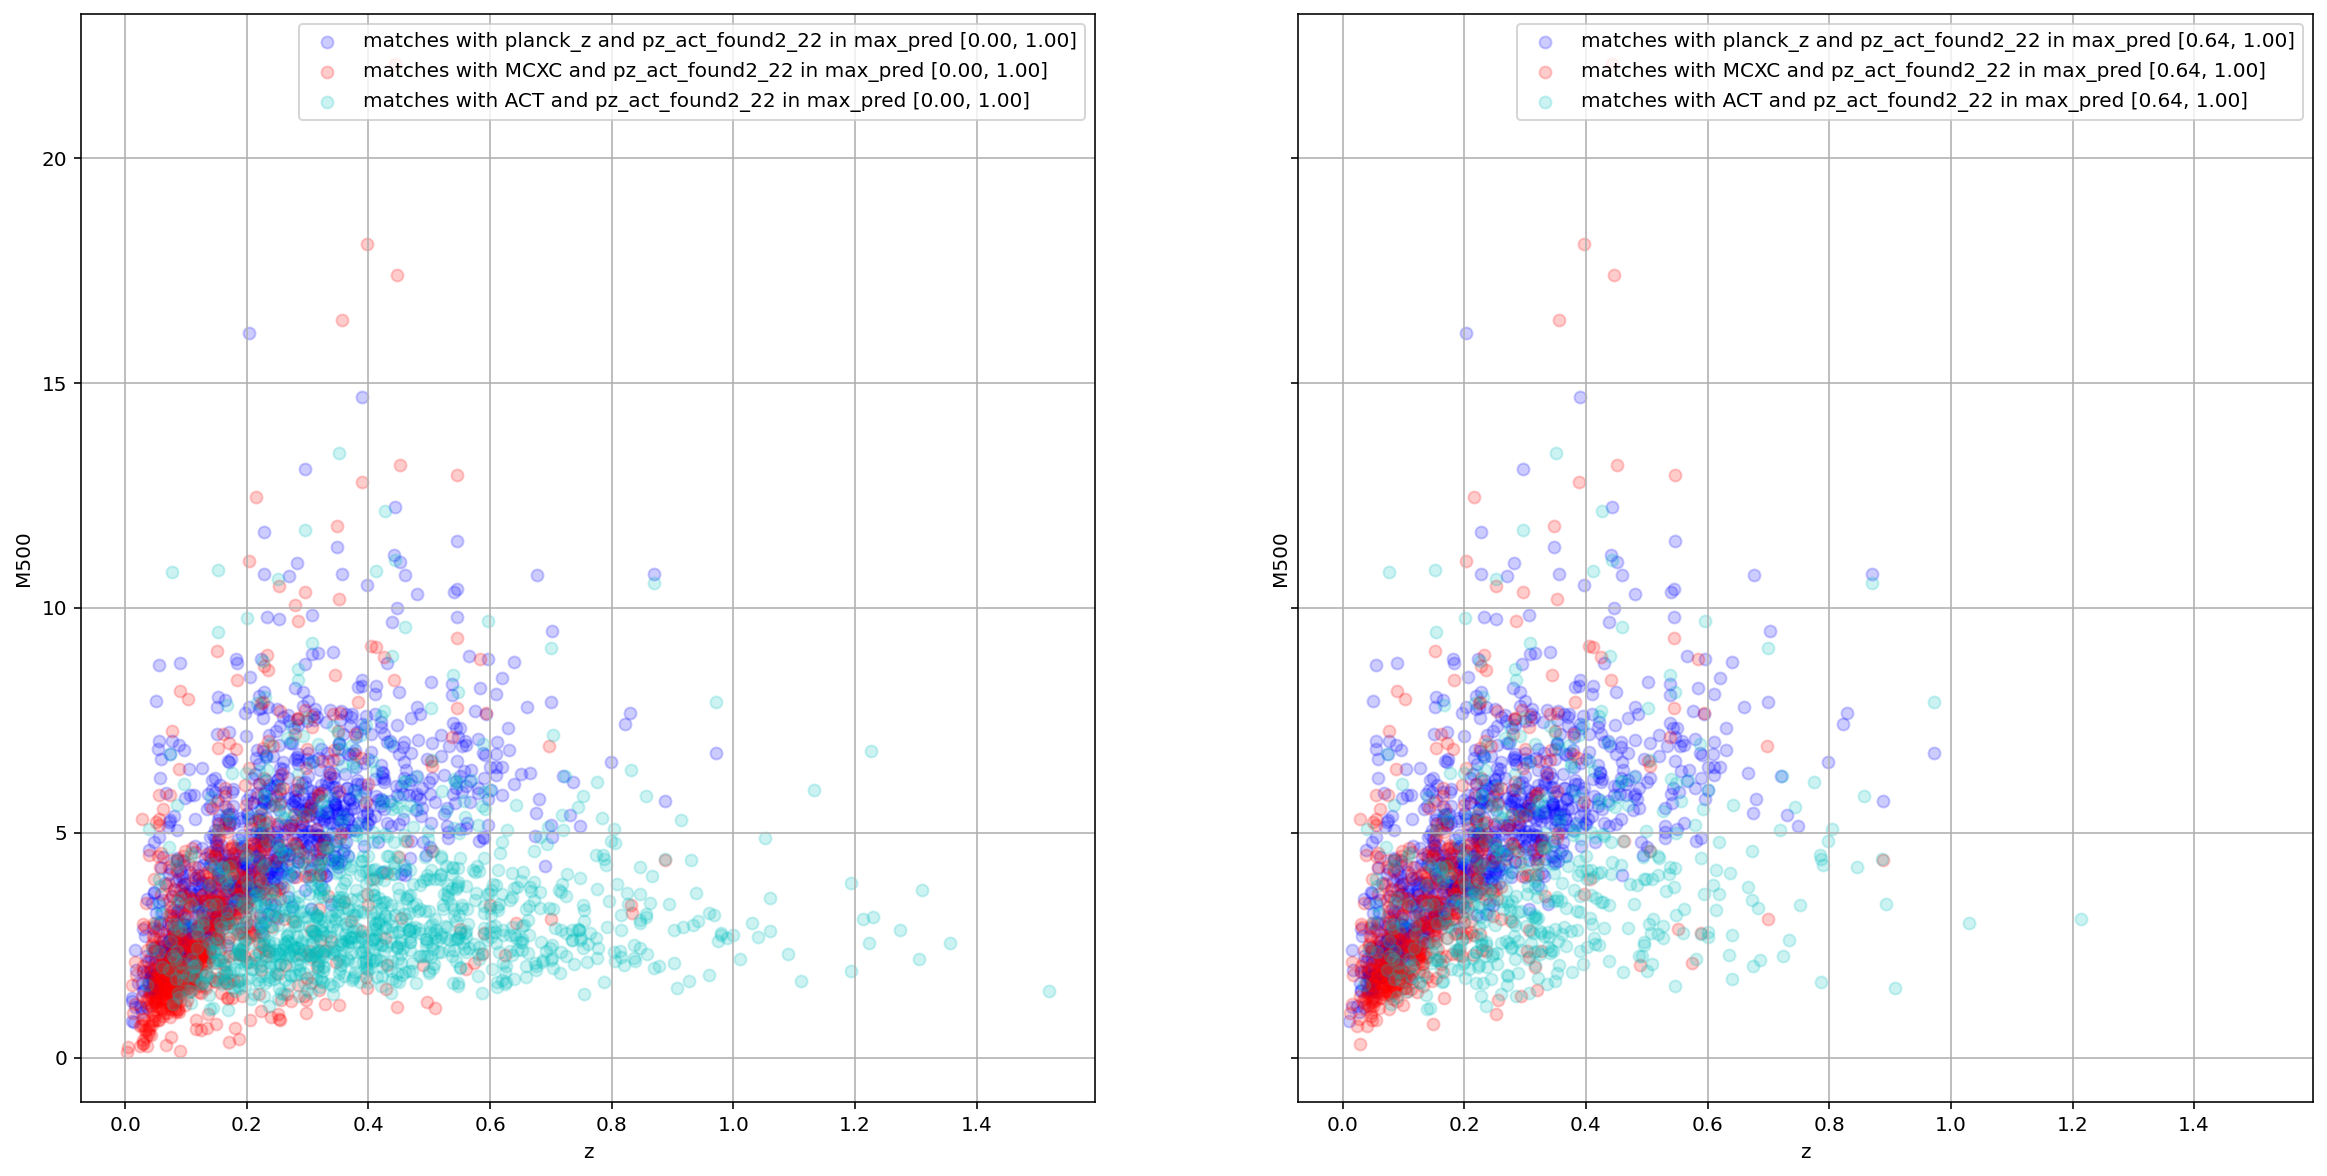

In [10]:
m500_z_graph('/home/rt2122/Data/detected_cats/full_pz_act_found2_22_thr0.1_step8_no_fn.csv', 'pz_act_found2_22')

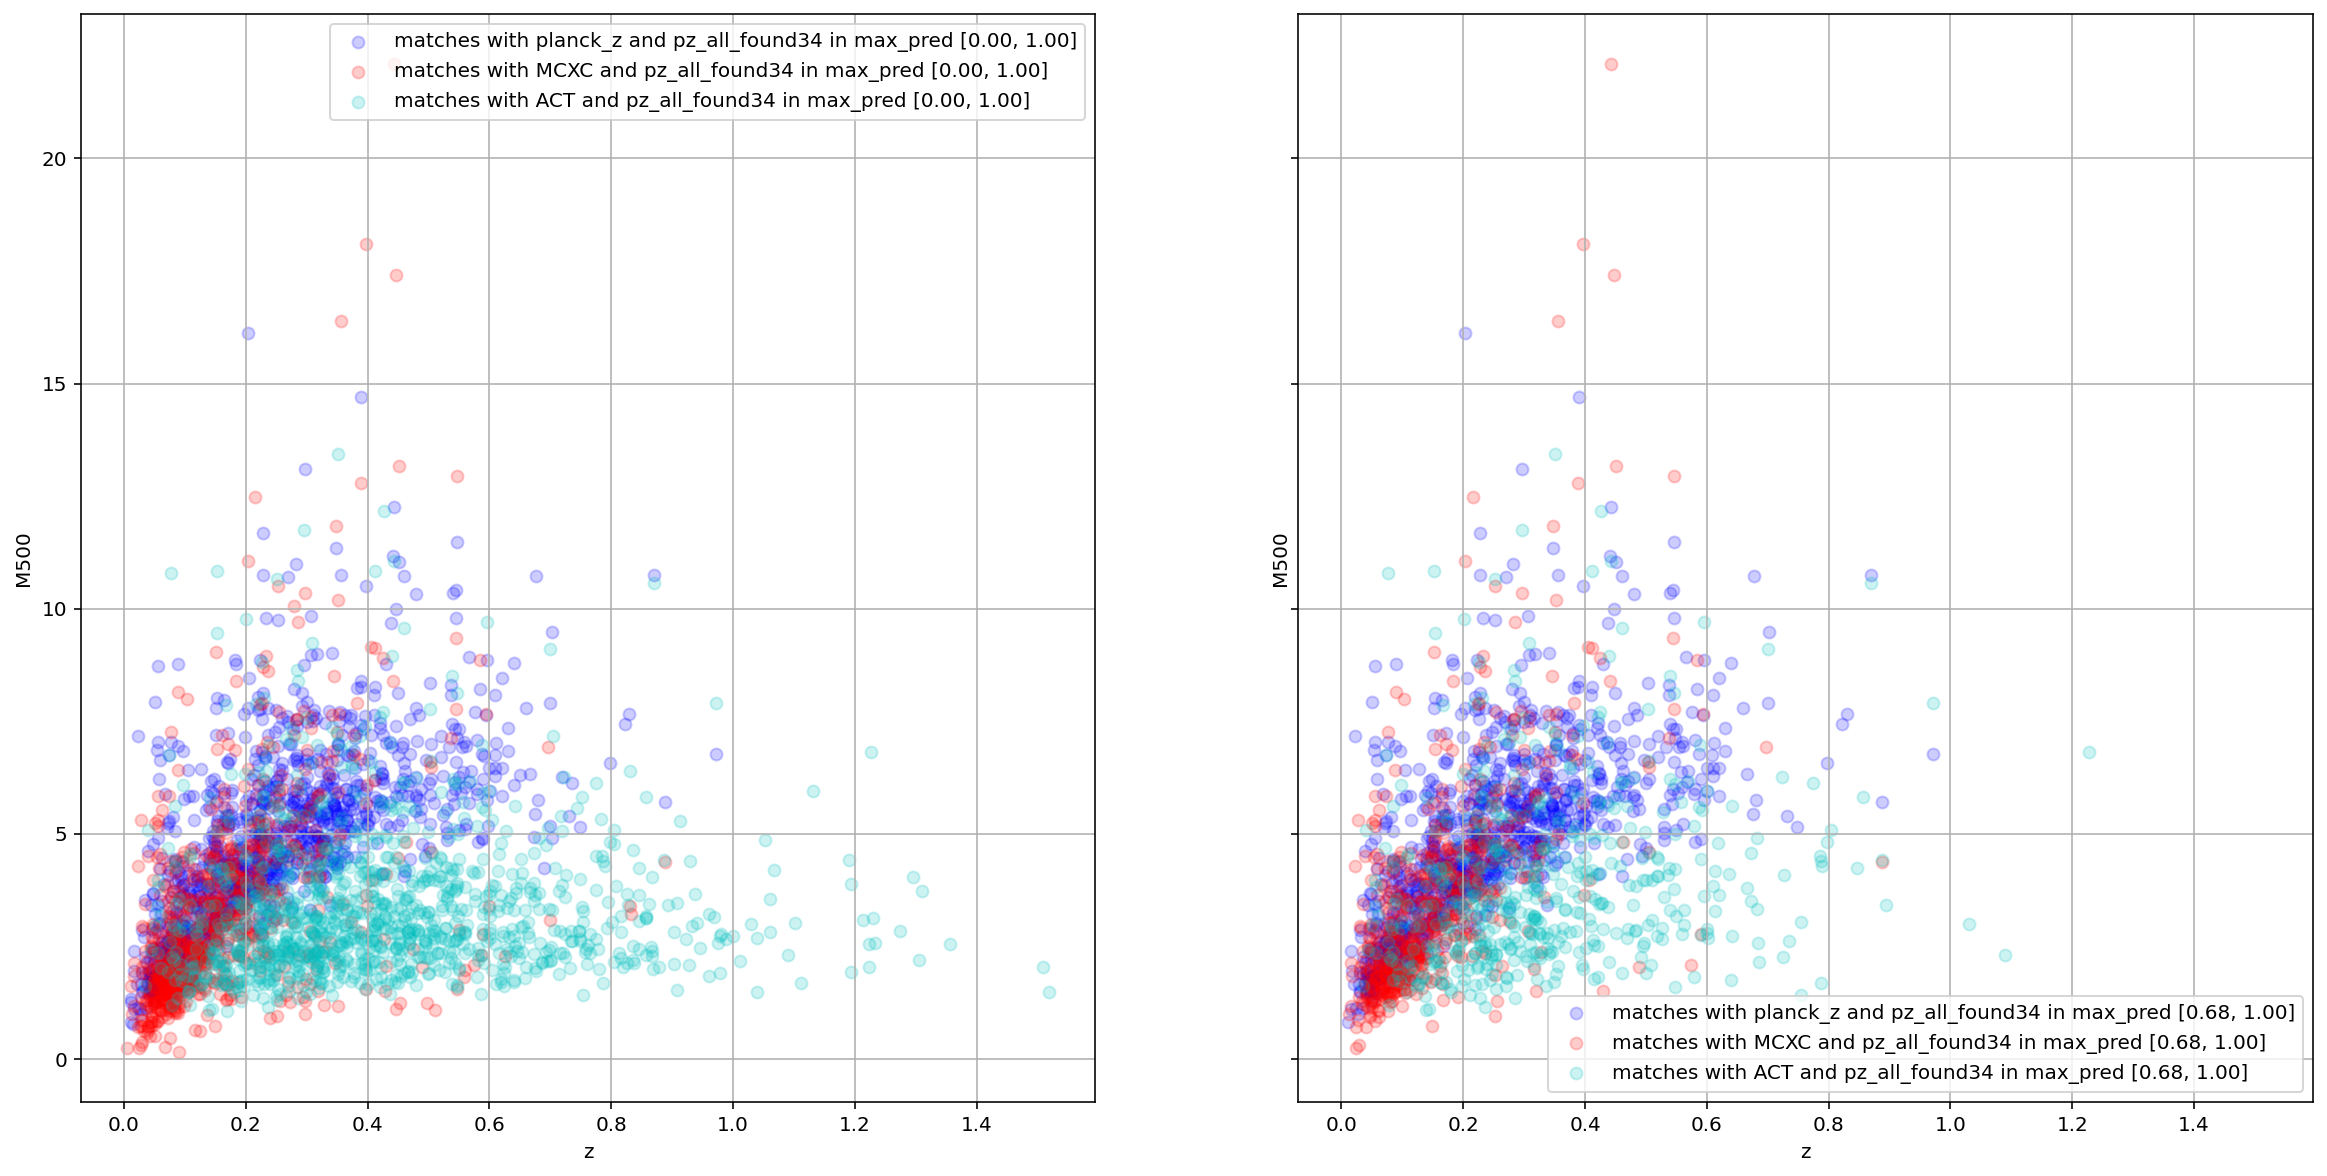

In [11]:
m500_z_graph('/home/rt2122/Data/detected_cats/full_pz_all_found34_thr0.1_step8_no_fn.csv', 'pz_all_found34')